In [1]:
from torchvision.datasets import MNIST
from torchvision import transforms

img_size = 28  # 이미지의 높이와 폭

# 훈련 데이터를 취득
mnist_train = MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)

# 테스트 데이터를 취득
mnist_test = MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

print("훈련 데이터의 수: ", len(mnist_train), "테스트 데이터의 수: ", len(mnist_test))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.49MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 152kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.32MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.51MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

훈련 데이터의 수:  60000 테스트 데이터의 수:  10000


In [2]:
from torch.utils.data import DataLoader

# DataLoader의 설정
batch_size = 256
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [5]:
import torch
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(img_size * img_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, img_size * img_size)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
# net.cuda() # GPU로 전송
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


In [6]:
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 손실 로그
record_loss_train = []
record_loss_test = []

# 학습
for i in range(10):
    net.train()
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):
        # x, t = x.cuda(), t.cuda() # GPU로 전송
        # x, t = x.to(device), t.to(device)
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j + 1
    record_loss_train.append(loss_train)

    net.eval()  # 평가 모드
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):
        # x, t = x.cuda(), t.cuda() # GPU로 전송
        # x, t = x.to(device), t.to(device)
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j + 1
    record_loss_test.append(loss_test)

    if i % 1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 2.2259091052603215 Loss_Test: 2.107175272703171
Epoch: 1 Loss_Train: 1.857413093079912 Loss_Test: 1.4861748188734054
Epoch: 2 Loss_Train: 1.1508397959648295 Loss_Test: 0.8490431949496269
Epoch: 3 Loss_Train: 0.7328309409161832 Loss_Test: 0.6047005727887154
Epoch: 4 Loss_Train: 0.567680703832748 Loss_Test: 0.4949906799942255
Epoch: 5 Loss_Train: 0.4861771565802554 Loss_Test: 0.43574612606316804
Epoch: 6 Loss_Train: 0.4386461241448179 Loss_Test: 0.39864199087023733
Epoch: 7 Loss_Train: 0.40650038972814034 Loss_Test: 0.373693628795445
Epoch: 8 Loss_Train: 0.3834390542608626 Loss_Test: 0.3529797125607729
Epoch: 9 Loss_Train: 0.36645648238506723 Loss_Test: 0.33990318877622483


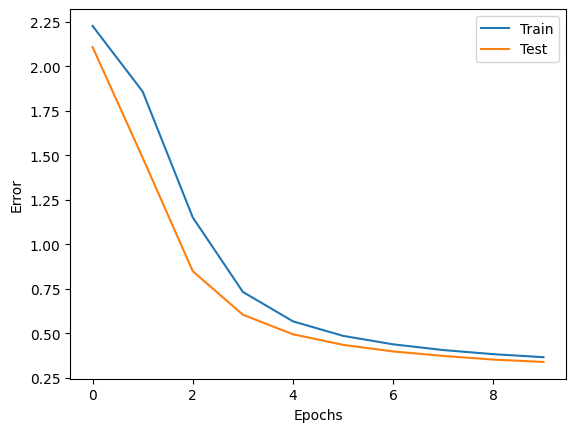

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [9]:
correct = 0
total = 0
net.eval()  # 평가 모드
for i, (x, t) in enumerate(test_loader):
    # x, t = x.cuda(), t.cuda() # GPU로 전송
    # x, t = x.to(device), t.to(device)
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)

print("정답률: ", str(correct / total * 100) + "%")

정답률:  90.45%
